In [86]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [87]:
#plot the number of images per each SK in 20 year intervals, for part 100 images
#all elements with year , part type, SK

path_to_xlsx = 'G:\\My Drive\\DataFiles\\images_related_100_104.xlsx'

In [88]:
df = pd.read_excel(path_to_xlsx)

In [89]:
# Function to filter SK_ keywords
def filter_sk_keywords(keywords):
    return [kw for kw in keywords.split(';') if kw.startswith('SK_')]

# Expand the DataFrame
expanded_rows = []
for index, row in df.iterrows():
    sk_keywords = filter_sk_keywords(row['keywords'])
    for sk in sk_keywords:
        expanded_rows.append({
            'images': row['images'],
            'keywords': sk,
            'year': row['year'],
            'place': row['place'],
            'custom_identifier': row['custom_identifier']
        })

# Create the new DataFrame
new_df = pd.DataFrame(expanded_rows)

In [90]:
# Filter new_df to keep only rows with keywords that start with SK_ followed by a number and a decimal
filtered_df = new_df[new_df['keywords'].str.match(r'^SK_\d\.\d+')]


In [91]:
filtered_df

,images,keywords,year,place,custom_identifier
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SK_2.8 Extended Uses of Sign,1561,Padua,311
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SK_2.8 Extended Uses of Sign,1561,Padua,311
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SK_1.2 Sphere Divided,1478,Venice,100
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SK_3.19 The Seven Climes,1478,Venice,100
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SK_4.4 Cause of lunar eclipse,1478,Venice,100
...,...,...,...,...,...
13313,http://www.researchspace.org/ontology/ImageReg...,SK_3.9 Movement of the Sun,1582,Antwerp,251
13314,http://www.researchspace.org/ontology/ImageReg...,SK_3.10 Day and Night,1582,Antwerp,251
13315,http://www.researchspace.org/ontology/ImageReg...,SK_3.10 Day and Night,1582,Antwerp,251
13316,http://www.researchspace.org/ontology/ImageReg...,SK_3.10 Day and Night,1582,Antwerp,251


In [92]:
part_100 = filtered_df[df['custom_identifier'] == 100 ]

C:\Users\nogas\AppData\Local\Temp\ipykernel_15880\2566681175.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  part_100 = filtered_df[df['custom_identifier'] == 100 ]


In [93]:
part_100

,images,keywords,year,place,custom_identifier
9,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SK_1.1 Sphere defined,1486,Leipzig,100
10,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SK_1.2 Sphere Divided,1486,Leipzig,100
11,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SK_1.2 Sphere Divided,1486,Leipzig,100
12,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SK_1.3 The Four Elements,1486,Leipzig,100
13,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SK_1.5 Their movements,1486,Leipzig,100
...,...,...,...,...,...
12250,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SK_1.16 measuring the earth’s circumference,1583,Lyon,283
12251,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SK_1.14 And a Mere Point in the universe,1583,Lyon,283
12252,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SK_1.14 And a Mere Point in the universe,1583,Lyon,283
12253,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SK_1.3 The Four Elements,1583,Lyon,283


C:\Users\nogas\AppData\Local\Temp\ipykernel_15880\3823142827.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


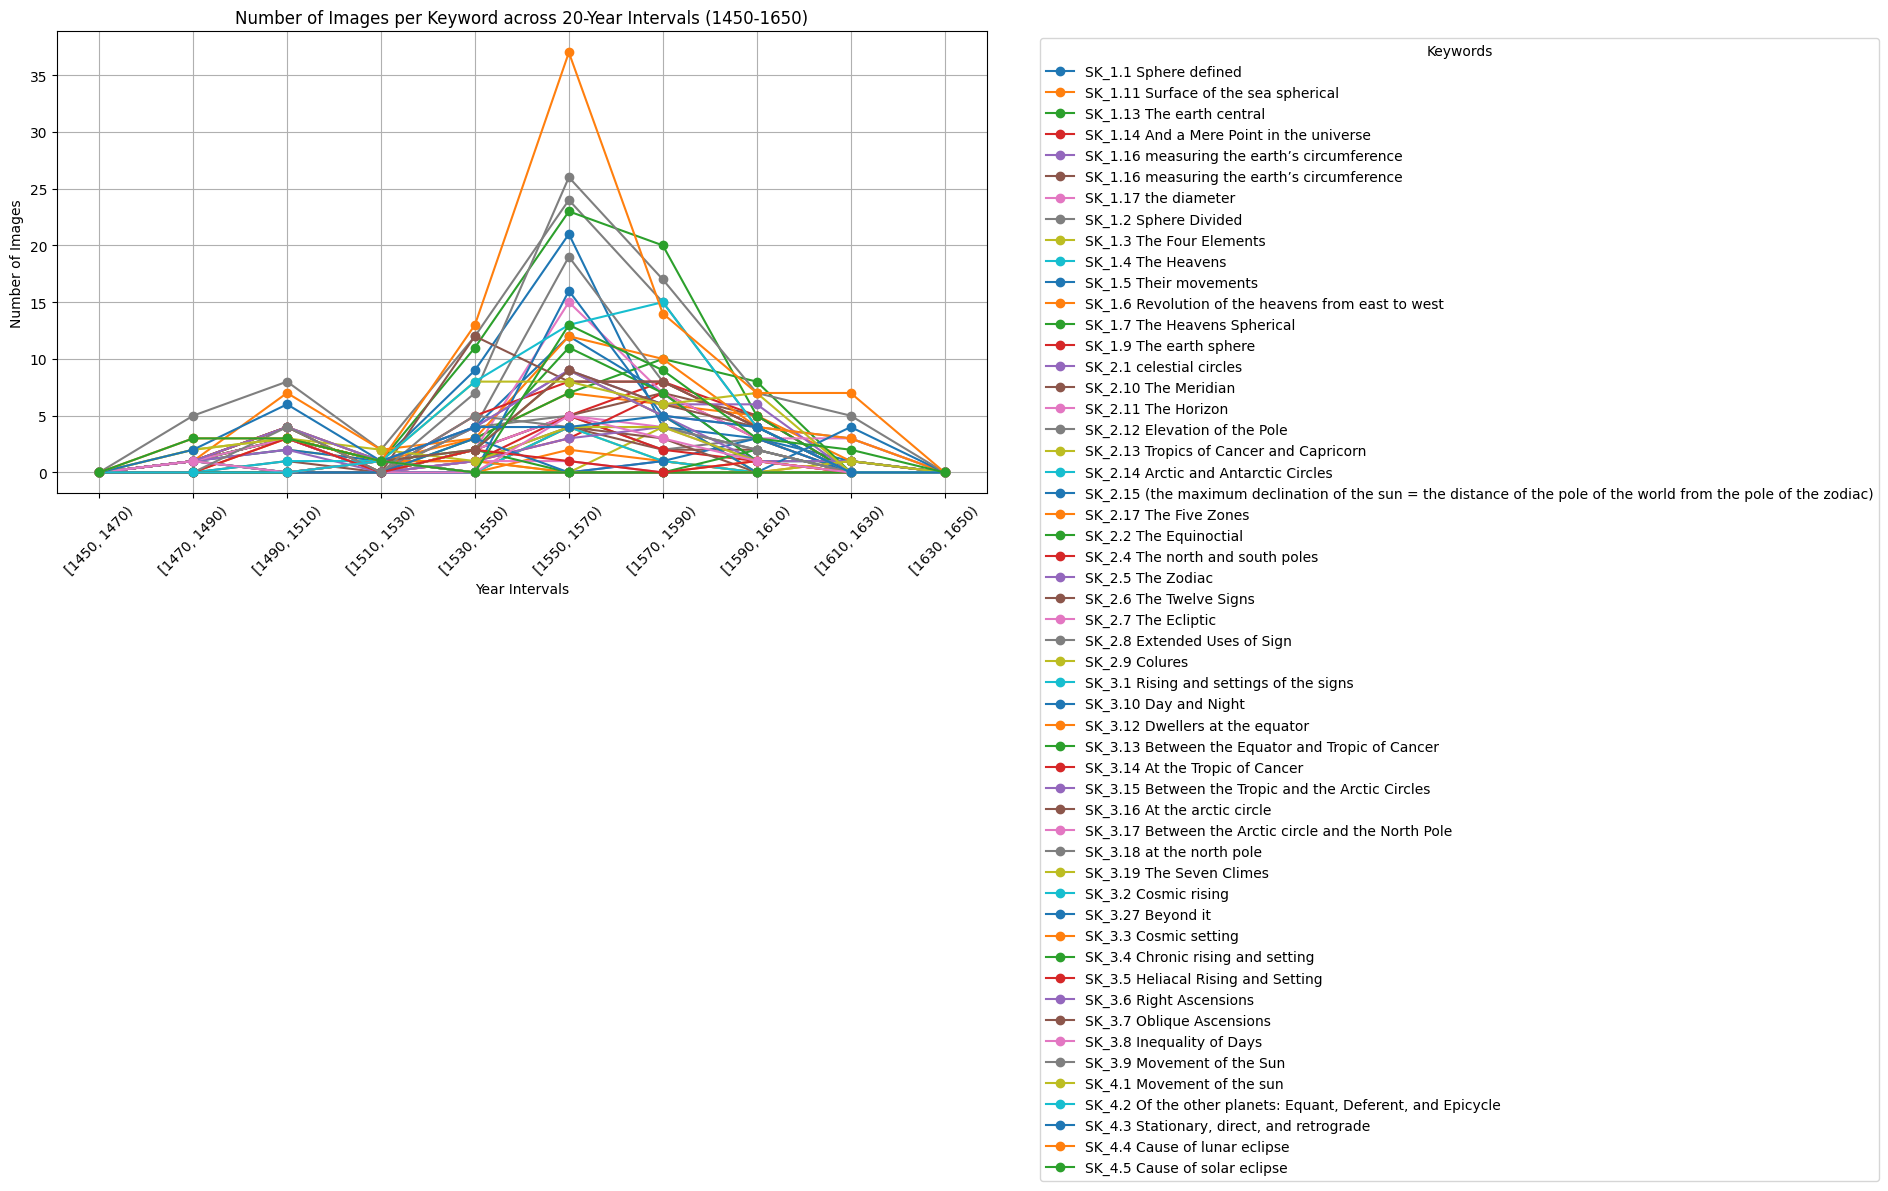

In [94]:
# Filter data for years between 1450 and 1650
filtered_df = part_100[(part_100['year'] >= 1450) & (part_100['year'] <= 1650)]

# Group by keyword and year interval (20-year bins), count images
grouped_df = filtered_df.groupby(['keywords', pd.cut(filtered_df['year'], bins=range(1450, 1660, 20), right=False)], observed=False).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot a line for each keyword
for keyword in grouped_df.index:
    plt.plot(grouped_df.columns.astype(str), grouped_df.loc[keyword], marker='o', label=keyword)

plt.xlabel('Year Intervals')
plt.ylabel('Number of Images')
plt.title('Number of Images per Keyword across 20-Year Intervals (1450-1650)')
plt.xticks(rotation=45)
plt.legend(title='Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_15880\765334158.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby(['chapter', pd.cut(filtered_df['year'], bins=range(1450, 1660, 20), right=False)]).size().unstack(fill_value=0)


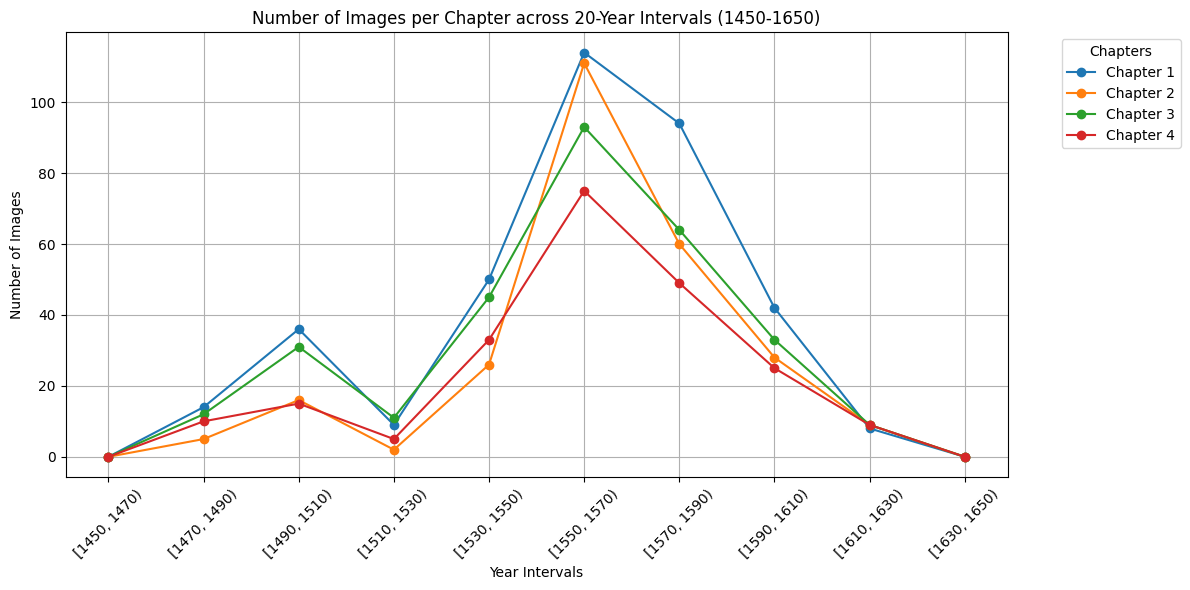

In [95]:
# Filter data for years between 1450 and 1650
filtered_df = part_100[(part_100['year'] >= 1450) & (part_100['year'] <= 1650)]

# Function to categorize keywords into chapters
def categorize_keyword(keyword):
    if keyword.startswith('SK_1'):
        return 'Chapter 1'
    elif keyword.startswith('SK_2'):
        return 'Chapter 2'
    elif keyword.startswith('SK_3'):
        return 'Chapter 3'
    elif keyword.startswith('SK_4'):
        return 'Chapter 4'
    else:
        return 'Other Chapters'

# Create a new column 'chapter' based on keyword categorization
filtered_df['chapter'] = filtered_df['keywords'].apply(categorize_keyword)

# Group by chapter and year interval (20-year bins), count images
grouped_df = filtered_df.groupby(['chapter', pd.cut(filtered_df['year'], bins=range(1450, 1660, 20), right=False)]).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot a line for each chapter
for chapter in grouped_df.index:
    plt.plot(grouped_df.columns.astype(str), grouped_df.loc[chapter], marker='o', label=chapter)

plt.xlabel('Year Intervals')
plt.ylabel('Number of Images')
plt.title('Number of Images per Chapter across 20-Year Intervals (1450-1650)')
plt.xticks(rotation=45)
plt.legend(title='Chapters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_15880\3986912265.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


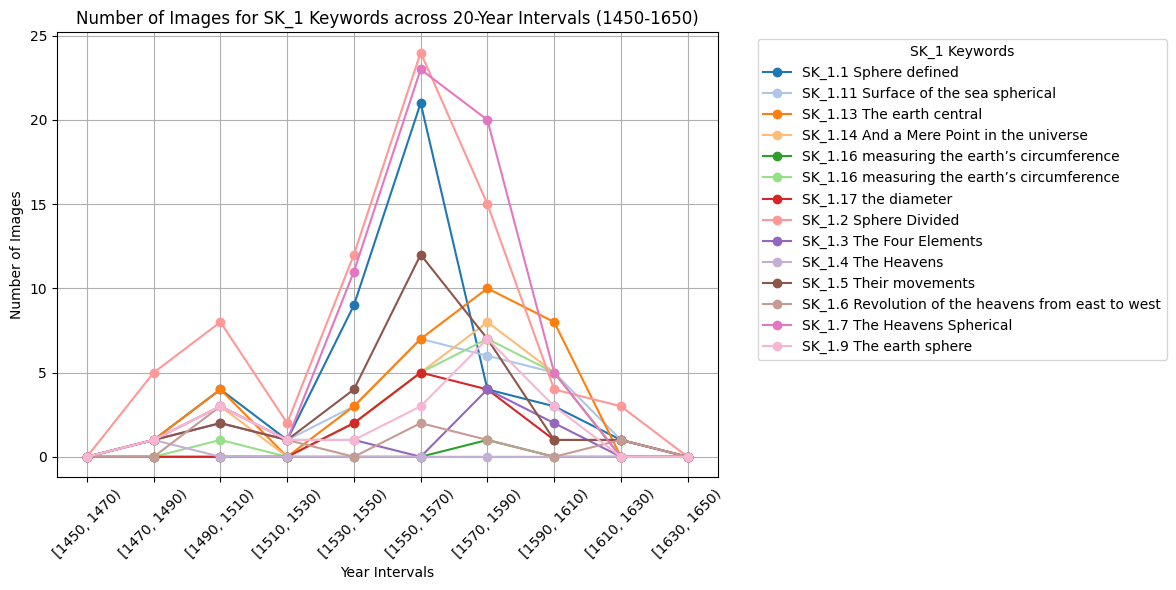

In [96]:
# Filter data for keywords starting with 'SK_1'
sk_1_df = part_100[part_100['keywords'].str.startswith('SK_1')]

# Group by keyword and year interval (20-year bins), count images
grouped_df = sk_1_df.groupby(['keywords', pd.cut(sk_1_df['year'], bins=range(1450, 1660, 20), right=False)], observed=False).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Define a list of unique colors for each SK_1 keyword using 'tab20' colormap
cmap = plt.cm.get_cmap('tab20')
colors = cmap.colors[:len(grouped_df.index)]

# Plot a line for each SK_1 keyword using the unique colors
for i, (keyword, color) in enumerate(zip(grouped_df.index, colors)):
    plt.plot(grouped_df.columns.astype(str), grouped_df.loc[keyword], marker='o', label=keyword, color=color)

plt.xlabel('Year Intervals')
plt.ylabel('Number of Images')
plt.title('Number of Images for SK_1 Keywords across 20-Year Intervals (1450-1650)')
plt.xticks(rotation=45)
plt.legend(title='SK_1 Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_15880\275151869.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


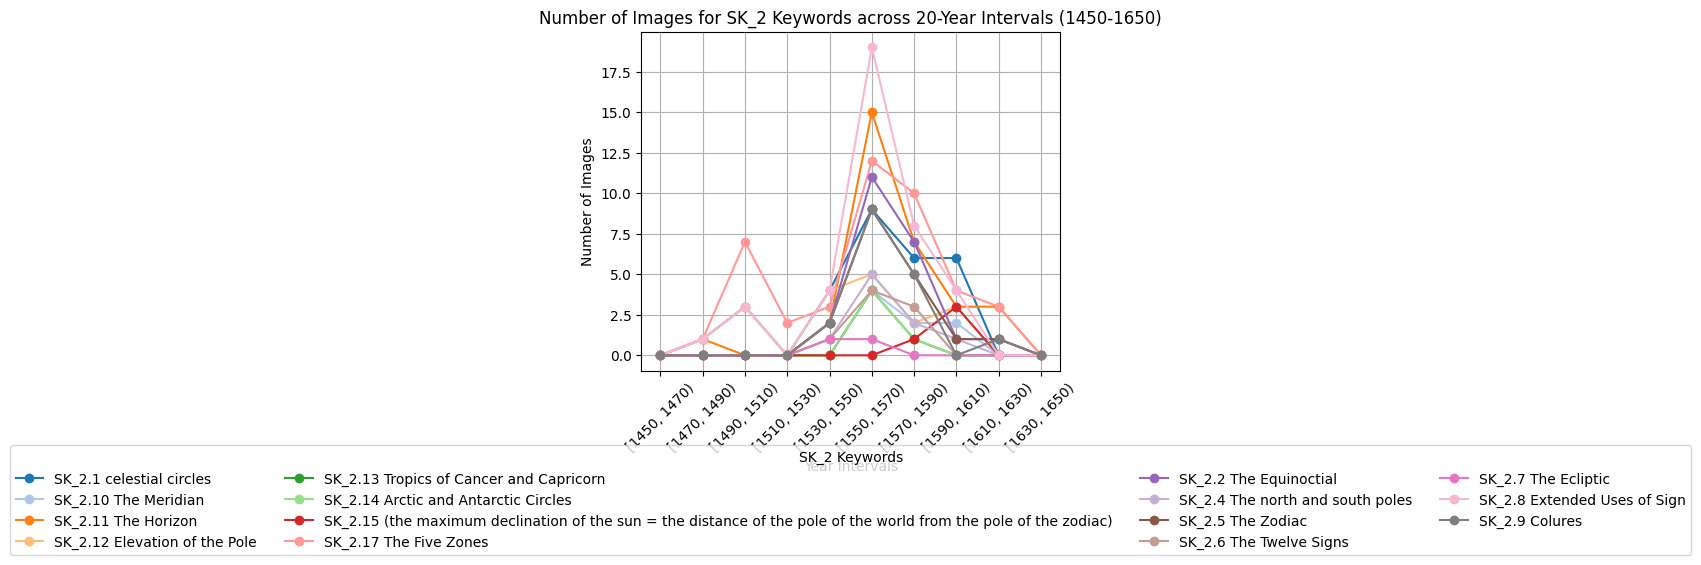

In [97]:
# Filter data for keywords starting with 'SK_2'
sk_2_df = part_100[part_100['keywords'].str.startswith('SK_2')]

# Group by keyword and year interval (20-year bins), count images
grouped_df = sk_2_df.groupby(['keywords', pd.cut(sk_2_df['year'], bins=range(1450, 1660, 20), right=False)], observed=False).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Retrieve the 'tab20' colormap
cmap = cm.get_cmap('tab20')

# Number of unique SK_2 keywords
num_keywords = len(grouped_df.index)

# Plot a line for each SK_2 keyword using the 'tab20' colormap
for i, (keyword, color) in enumerate(zip(grouped_df.index, cmap.colors[:num_keywords])):
    plt.plot(grouped_df.columns.astype(str), grouped_df.loc[keyword], marker='o', label=keyword, color=color)

plt.xlabel('Year Intervals')
plt.ylabel('Number of Images')
plt.title('Number of Images for SK_2 Keywords across 20-Year Intervals (1450-1650)')
plt.xticks(rotation=45)

# Adjust legend placement under the graph
plt.legend(title='SK_2 Keywords', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_15880\1447803742.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


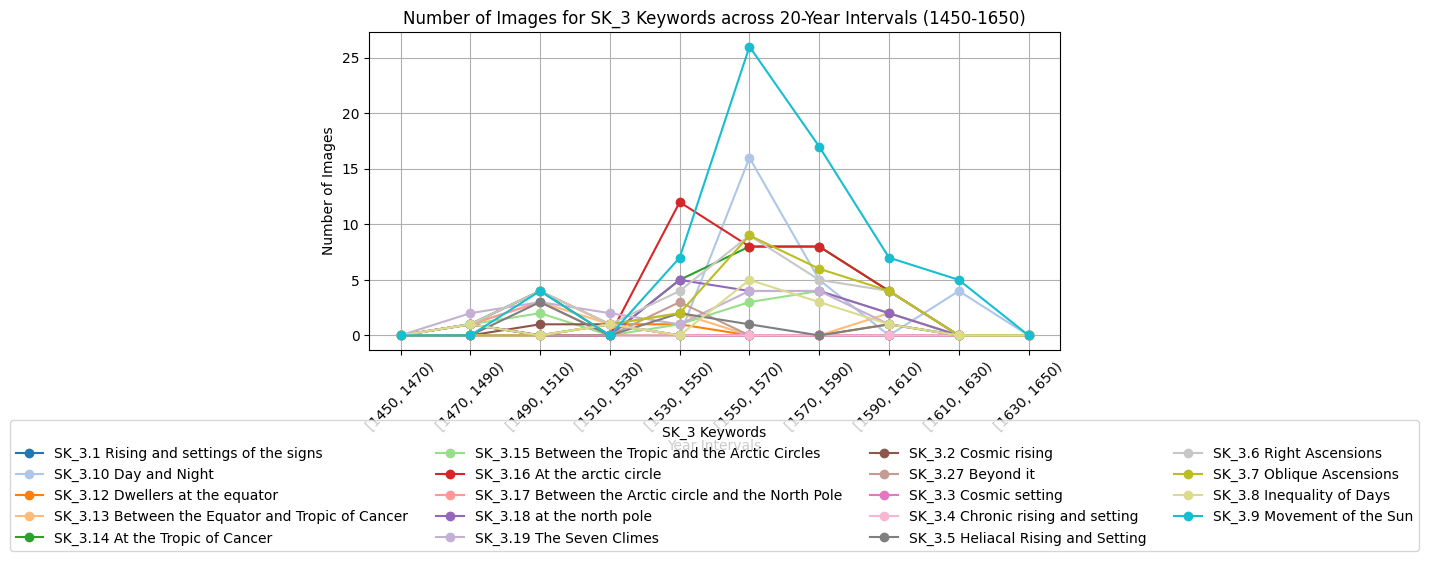

In [101]:
# Filter data for keywords starting with 'SK_2'
sk_3_df = part_100[part_100['keywords'].str.startswith('SK_3')]

# Group by keyword and year interval (20-year bins), count images
grouped_df = sk_3_df.groupby(['keywords', pd.cut(sk_3_df['year'], bins=range(1450, 1660, 20), right=False)], observed=False).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Retrieve the 'tab20' colormap
cmap = cm.get_cmap('tab20')

# Number of unique SK_2 keywords
num_keywords = len(grouped_df.index)

# Plot a line for each SK_2 keyword using the 'tab20' colormap
for i, (keyword, color) in enumerate(zip(grouped_df.index, cmap.colors[:num_keywords])):
    plt.plot(grouped_df.columns.astype(str), grouped_df.loc[keyword], marker='o', label=keyword, color=color)

plt.xlabel('Year Intervals')
plt.ylabel('Number of Images')
plt.title('Number of Images for SK_3 Keywords across 20-Year Intervals (1450-1650)')
plt.xticks(rotation=45)

# Adjust legend placement under the graph
plt.legend(title='SK_3 Keywords', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_15880\1192540928.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


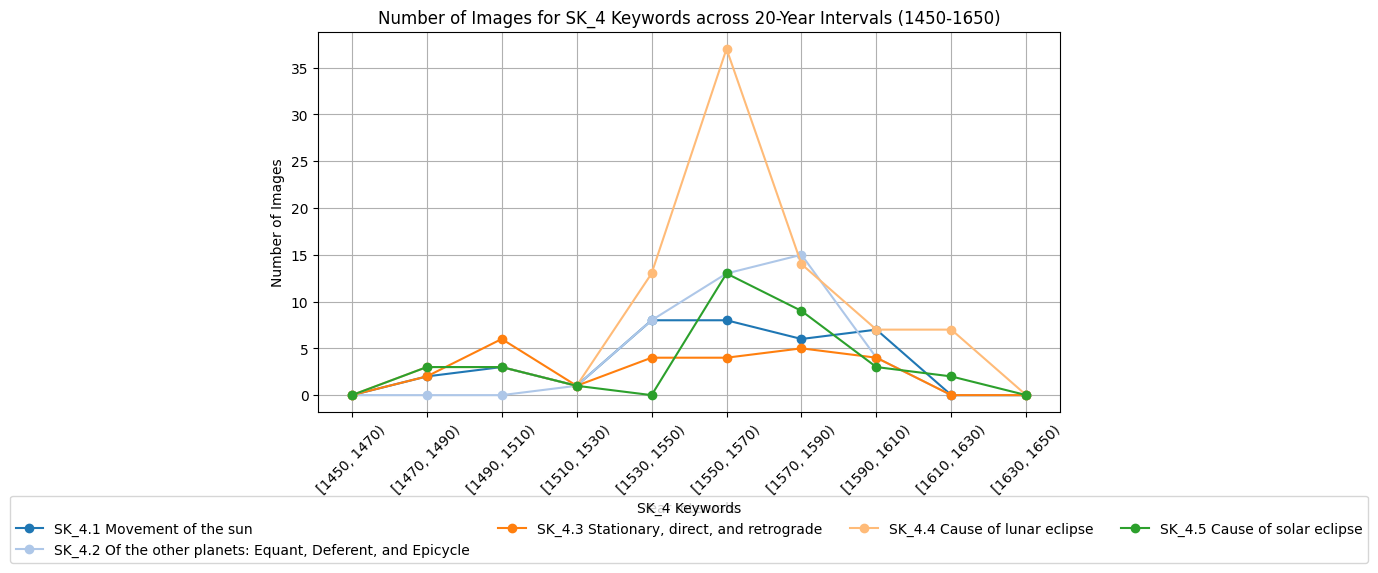

In [102]:
# Filter data for keywords starting with 'SK_2'
sk_4_df = part_100[part_100['keywords'].str.startswith('SK_4')]

# Group by keyword and year interval (20-year bins), count images
grouped_df = sk_4_df.groupby(['keywords', pd.cut(sk_4_df['year'], bins=range(1450, 1660, 20), right=False)], observed=False).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Retrieve the 'tab20' colormap
cmap = cm.get_cmap('tab20')

# Number of unique SK_2 keywords
num_keywords = len(grouped_df.index)

# Plot a line for each SK_2 keyword using the 'tab20' colormap
for i, (keyword, color) in enumerate(zip(grouped_df.index, cmap.colors[:num_keywords])):
    plt.plot(grouped_df.columns.astype(str), grouped_df.loc[keyword], marker='o', label=keyword, color=color)

plt.xlabel('Year Intervals')
plt.ylabel('Number of Images')
plt.title('Number of Images for SK_4 Keywords across 20-Year Intervals (1450-1650)')
plt.xticks(rotation=45)

# Adjust legend placement under the graph
plt.legend(title='SK_4 Keywords', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.grid(True)
plt.tight_layout()
plt.show()